# 카메라 스티커앱 만들기 첫걸음

- 평가문항
1. 자기만의 카메라앱 기능 구현을 완수하였다. 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다. 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다. 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

In [60]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import dlib  # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ○ 얼굴 정면 사진

<function matplotlib.pyplot.show(*args, **kw)>

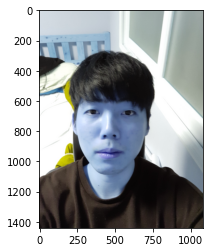

In [3]:
my_image_path = ('/content/drive/MyDrive/exploration/pic/one.jpg')
img_bgr = cv2.imread(my_image_path,1) # OpenCV로 이미지를 불러옵니다,
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다,
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show # 이미지를 출력해준다. (실제 출력)

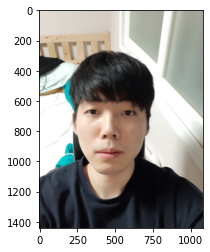

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

- 아래의 그래프는 SVM을 활용한 분류다. 1과 0으로 분류를 하게 되는 원리를 
나타낸 것이다. 이제 여기서 파란점이 얼굴이냐, 초록점이 얼굴이냐를 정하는것이 중요하다.
- 말 그대로 단순한 분류 knn을 활용하여 robust한 방법으로 분류는 가능하다. 하지만 각 벡터의 거리척도에 얼마만큼 적합한지 엔지니어가 일일이 가중치를 넣어야 되기 때문에 많은 시간이 걸린다. 
- 따라서 이번 노드에서는 dlib(딥러닝)을 활용한 효율적인 방법으로 분류하는 학습을 진행 할 것이다.

![2](https://raw.githubusercontent.com/fmfmsd/Chamchee/main/Exploration/Ex7/pic/2.png)

In [5]:
# hog detector 선언 
import dlib
detector_hog = dlib.get_frontal_face_detector() #  bounding box(얼굴의 범위를 말하는 듯?)를 지정


# bounding box 추출 
dlib_rects = detector_hog(img_rgb, 1) # (image, num of img pyramid)

- 여기서 image pyramid란 이미지를 단계적으로 축소시키며 분석하는 작업을 말한다.
참고 사진을 보면 이해가 쉬움
---

![3](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/3.png?raw=true)

rectangles[[(171, 542) (726, 1096)]]


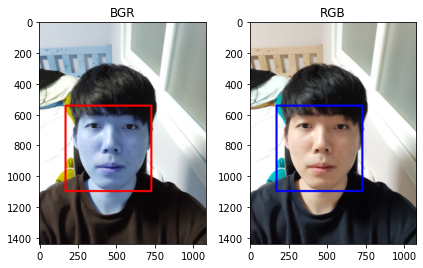

In [6]:
print(dlib_rects) # 찾은 얼굴 영역 좌표 출력 [[(left, top) (right, bottom)]]


for dlib_rect in dlib_rects:
    l = dlib_rect.left() # class detector_hog 안에 있는 메서드 호출
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (255,0,0), 12, lineType=cv2.LINE_AA) # cv2.rectangle(img, start, end, color, thickness)

plt.show()

# RGB 색상 변환
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.show()

plt.subplot(121)
plt.imshow(img_show)
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_show_rgb)
plt.title('RGB')
plt.tight_layout()
plt.show()

- opencv에서는 이미지 색좌표값을 bgr로 쓰기 때문에 rgb로 변환
- 얼굴 서칭
- rectangle[(***좌측 상단 좌표***),(***우측 하단 좌표***)]


In [7]:
model_path = '/content/drive/MyDrive/exploration/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #- 인스턴스 생성 및 할당

In [8]:
# landmark 찾기
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 클래스 호출(image, )
    print((points))
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    print(list_points)
    list_landmarks.append(list_points)
    print(list_landmarks)

print(len(list_landmarks[0]))

[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (697, 813), (711, 748), (715, 682), (264, 617), (297, 590), (340, 582), (388, 587), (430, 605), (510, 614), (552, 602), (597, 599), (643, 608), (673, 639), (464, 669), (463, 711), (462, 753), (461, 796), (419, 846), (441, 848), (463, 851), (487, 846), (509, 842), (312, 675), (338, 662), (369, 662), (396, 682), (368, 687), (336, 688), (541, 687), (568, 666), (600, 667), (626, 680), (602, 691), (570, 691), (379, 939), (412, 924), (445, 911), (466, 918), (487, 910), (518, 925), (552, 938), (518, 967), (488, 979), (466, 981), (444, 979), (412, 966), (393, 940), (444, 938), (465, 941), (487, 938), (540, 940), (488, 946), (467, 948), (446, 945)]
[[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (69

![one](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/one.png?raw=true)
![4](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/4.png?raw=true)

- 좌측의 얼굴 인식이 된 좌표를 우측의 랜드마크 좌표(68개)의 리스트값이 지정된 것을 확인 할 수 있다.
- 수염은 한 가운데인 [33] 좌표 사이에 집어 넣으면 될 것이다.

[[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (697, 813), (711, 748), (715, 682), (264, 617), (297, 590), (340, 582), (388, 587), (430, 605), (510, 614), (552, 602), (597, 599), (643, 608), (673, 639), (464, 669), (463, 711), (462, 753), (461, 796), (419, 846), (441, 848), (463, 851), (487, 846), (509, 842), (312, 675), (338, 662), (369, 662), (396, 682), (368, 687), (336, 688), (541, 687), (568, 666), (600, 667), (626, 680), (602, 691), (570, 691), (379, 939), (412, 924), (445, 911), (466, 918), (487, 910), (518, 925), (552, 938), (518, 967), (488, 979), (466, 981), (444, 979), (412, 966), (393, 940), (444, 938), (465, 941), (487, 938), (540, 940), (488, 946), (467, 948), (446, 945)]]
1


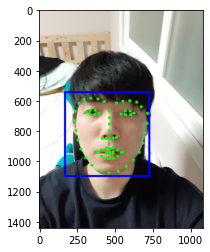

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points): # list_points는 랜드마크 좌표의 튜플리스트
        cv2.circle(img_show, point, 10, (0, 255, 0), -1) # yellow
print(list_landmarks) #- list_points의 요소들은 (x,y) 튜플 쌍으로 이뤄짐.
print(len(list_landmarks))

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 얼굴 인식이 된 것을 확인 가능하다.

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0] 
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(463, 851)
(x,y) : (463,851)
(w,h) : (556,556)


- x,y 는 스티커의 좌표값, w, h 는 스티커의 너비와 높이

(556, 556, 3)


<function matplotlib.pyplot.show(*args, **kw)>

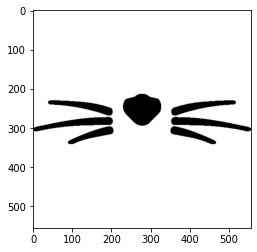

In [11]:
sticker_path = '/content/drive/MyDrive/exploration/pic/cat-whiskers.png'

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정
img_sticker = cv2.imread(sticker_path)# 스티커를 불러온다.
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show

In [12]:
refined_x = x - w // 2 # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

(x,y) : (185,573)


In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

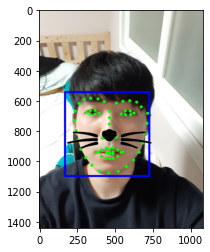

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

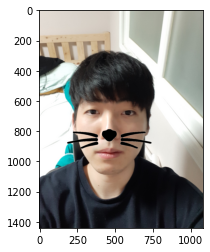

In [15]:
# bounding box와 landmark를 제거
# img_show 대신 img_rgb를 활용해보자.

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

- 얼굴이 정면이면 인식을 잘하는 것을 확인 할 수 있었다.

# ● 다양한 얼굴 사진

<function matplotlib.pyplot.show(*args, **kw)>

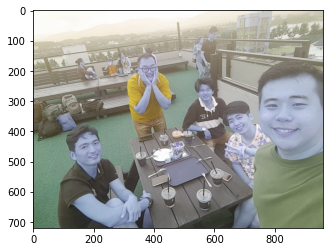

In [82]:
my_image_path = ('/content/drive/MyDrive/exploration/pic/five3.jpg')
img_bgr = cv2.imread(my_image_path,1) # OpenCV로 이미지를 불러옵니다,
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다,
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show # 이미지를 출력해준다. (실제 출력)

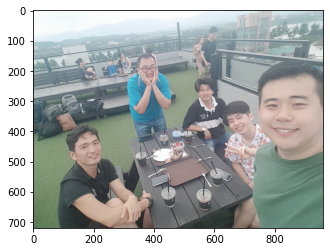

In [83]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [84]:
# hog detector 선언 
import dlib
detector_hog = dlib.get_frontal_face_detector() #  bounding box(얼굴의 범위를 말하는 듯?)를 지정


# bounding box 추출 
dlib_rects = detector_hog(img_rgb, 1) # (image, num of img pyramid)

rectangles[[(549, 252) (592, 295)], [(737, 263) (923, 449)], [(145, 415) (235, 504)], [(635, 337) (710, 412)], [(349, 170) (411, 232)]]


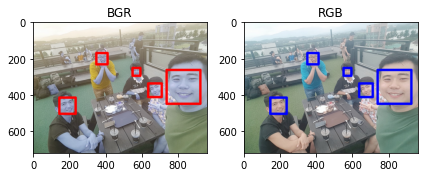

In [85]:
print(dlib_rects) # 찾은 얼굴 영역 좌표 출력 [[(left, top) (right, bottom)]]


for dlib_rect in dlib_rects:
    l = dlib_rect.left() # class detector_hog 안에 있는 메서드 호출
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (255,0,0), 12, lineType=cv2.LINE_AA) # cv2.rectangle(img, start, end, color, thickness)

plt.show()

# RGB 색상 변환
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.show()

plt.subplot(121)
plt.imshow(img_show)
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_show_rgb)
plt.title('RGB')
plt.tight_layout()
plt.show()

[[(547, 269), (548, 275), (549, 280), (551, 285), (554, 290), (558, 293), (562, 297), (568, 299), (573, 300), (579, 298), (583, 295), (587, 291), (591, 286), (592, 281), (593, 276), (593, 270), (593, 264), (552, 264), (555, 262), (559, 260), (563, 260), (567, 261), (573, 260), (576, 258), (580, 258), (584, 258), (587, 261), (570, 265), (571, 269), (571, 273), (571, 277), (566, 279), (569, 280), (572, 280), (574, 280), (576, 279), (557, 267), (559, 266), (562, 266), (564, 267), (562, 267), (559, 267), (576, 266), (578, 264), (581, 264), (583, 264), (581, 265), (579, 265), (563, 286), (566, 283), (569, 283), (572, 283), (574, 282), (578, 282), (581, 284), (578, 287), (575, 289), (572, 290), (570, 290), (566, 289), (564, 286), (569, 284), (572, 284), (575, 284), (580, 284), (575, 287), (572, 287), (569, 287)], [(751, 315), (751, 337), (752, 359), (754, 381), (762, 403), (775, 423), (792, 440), (812, 455), (836, 461), (863, 457), (889, 445), (914, 430), (934, 411), (945, 387), (950, 361), 

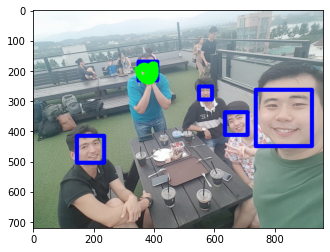

In [88]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points): # list_points는 랜드마크 좌표의 튜플리스트
        cv2.circle(img_show, point, 10, (0, 255, 0), -1) # yellow
print(list_landmarks) #- list_points의 요소들은 (x,y) 튜플 쌍으로 이뤄짐.
print(len(list_landmarks))


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 일단 얼굴에 bounding box 적용하는 것은 성공했기 때문에 조금만 손보면 될 것 같다.

In [105]:
def facial_tracking(picture_name, background = 255):
    my_image_path = ('/content/drive/MyDrive/exploration/pic/five3.jpg')
    img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    
    plt.figure(figsize=(15, 5)) 
    plt.subplot(131)
    plt.title('before') # 원본 rgb사진
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

    # detector를 선언합니다
    detector_hog = dlib.get_frontal_face_detector()

    # detector_hog를 이용해서 얼굴의 bounding box를 추출
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (255, 0, 0), 2, lineType=cv2.LINE_AA)

    #  landmark 모델을 불러옵니다.
    model_path = '/content/drive/MyDrive/exploration/model/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
        
    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다. 찾은 face landmark마다 sticker를 붙혀줍니다.
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    
    else:
        for landmark in list_landmarks: # bounding box 안에서 인식 된 모든 얼굴에 점을 찍어준다.
            for point in landmark:
                cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        plt.subplot(132)
        plt.title('landmark')
        plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

        for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
            x = landmark[33][0]
            y = landmark[33][1]
            w = h = dlib_rect.width()

            sticker_path = '/content/drive/MyDrive/exploration/pic/cat-whiskers.png'
            img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
            img_sticker = cv2.resize(img_sticker, (w,h))
            refined_x = x - w // 2
            refined_y = y - h // 2

            if refined_x < 0: 
                img_sticker = img_sticker[:, -refined_x:]
                refined_x = 0
            if refined_y < 0:
                img_sticker = img_sticker[-refined_y:, :]
                refined_y = 0

            
            sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
            img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
                np.where(img_sticker== background,sticker_area,img_sticker).astype(np.uint8)

        
        plt.subplot(133)
        plt.title('after')
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()

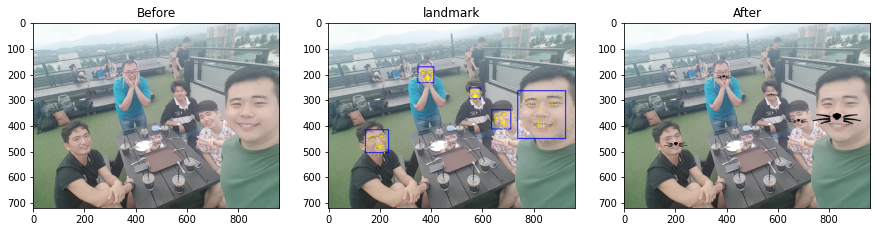

In [106]:
facial_tracking('five3.png')


- 위의 처리과정을 한번에 묶어서 사용
- 반복문을 활용하여 한 사진안에 여러 얼굴을 인식하는 기능을 추가하니 모두에게 고양이 수염을 붙이는 데 성공을 하였다. 아래 사진과 비교를 해보면 좋을 것 같아서 첨부.


--- error ---

![error](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/error.png?raw=true)
 

# 회고

- opencv 파일 특성


> 1. (세로,가로,색)으로 읽는 것이 익숙하지가 않았다. 대부분 (가로,세로,색)으로 생각할텐데 가로세로 부분이 바뀌어 있어서 사진의 위치를 계산해줄 때 힘들었다.
> 2. y축의 좌표가 좌상단에서 시작해서 그런지 마이너스 연산자를 사용해야 했다.

- 모든 얼굴이 인식이 된다고 생각하였는데, rotate를 활용해서 각도를 틀면 얼굴을 인식하지 못한다. 근데 또 단체 사진에서 얼굴이 기울어져 있는건 또 잡아 낸다. 정확히 인식을 어떻게 하는 건지??

- 한 사진 안에 여러명이 있는 경우 랜드마크에 반복문을 적용해야 얼굴 인식을 다 시킬수 있는 것을 알아내는데 거의 이틀정도 걸린 것 같다.

- 정지되어 있는 사진의 처리도 이렇게 힘든데 , 구글밋과 같이 실시간 페이셜 트래킹을 만든 사람에 대해 다시 한번 경의를 표한다.